In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime
from tqdm import tqdm
#import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
# nltk.download('stopwords') 
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob 
from bs4 import BeautifulSoup
from wordcloud import WordCloud 
from functools import partial
import itertools    
import json
import spacy
#!python -m spacy download en_core_web_sm
sp = spacy.load('en_core_web_sm')
import os.path
from nltk.corpus import stopwords
import numpy as np
import contractions

In [2]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
!dir

In [3]:
data_dir = "../src/"
# folder = 'plots1/'
charts_dir = data_dir + "covid/"
model_dir = data_dir + "covid_model/"
if not os.path.exists(charts_dir):
    os.mkdir(charts_dir)
    os.mkdir(model_dir)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data ='../dataset/' + "train.csv"
df=pd.read_csv(data,encoding='latin-1')
df.head()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-20,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-20,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-20,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-20,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-20,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# import chardet
# file ='../dataset/' + "train.csv"
# with open(file, 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

In [ ]:
# df1=pd.read_csv(file,encoding='ISO-8859-1')
# df1.head()

In [5]:
df.columns

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [6]:
df=df.rename(columns = {'OriginalTweet':'reviews'})
df.tail()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserName,ScreenName,Location,TweetAt,reviews,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-20,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-20,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-20,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-20,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-20,@TartiiCat Well new/used Rift S are going for ...,Negative


# Text Preprocessing

In [7]:
stop_words = list(sp.Defaults.stop_words)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
new_stopwords = ["all", "due", "to", "on", "daily",'t','s','don t','tp','ga']
stop_words.extend(new_stopwords)
#stopwords.update()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#Text Cleaning
def text_cleaner(text):
    text = ' '.join(re.sub(r"(\w+:\/\/\S+)", " ", str(text)).split())
    text = ' '.join(re.sub(r'[^\w\s]','', str(text)).split())
    # Remove punctuations
    text = ' '.join(re.sub(r"[\.\,\!\?\:\;\-\=]", " ", str(text)).split())
    # lower case
    text = text.lower()    
    # Replace contractions eg. wouldn't, wasn't
    text = contractions.fix(text)
    # final clean
    text = ' '.join(re.sub(r"[\\\(/\)]|('s|')", " ", str(text)).split())
    text = ' '.join(re.sub(r"[\b[a-zA-Z]\b]", "", str(text)).split())
    text = ' '.join(re.sub(r"[^a-zA-Z]", " ",str(text)).split()) #keep abc one
    return text

def clean_text(text):
    text=re.sub(r'[^\w\s]','',str(text))
    
def stopword_cleaner(text):
    if text is "":
        return ""    
    text = text.split()
    text_new = " ".join([i for i in text if i not in stop_words])
    return text_new    

def to_lower(text): 
    if len(text) >0:
        return text.lower()
    return ""

def singularize(text):  
    text = text.split()
    text_new = []
    for word in text:
        blob = TextBlob(word)
        text_new.append(blob.words[0].singularize())
    return " ".join(text_new)


def all_words_list(reviews):
    all_words = ' '.join([text for text in reviews if text.endswith("s")]) 
    return all_words.split()

def save_unique_words(df):
    all_words = all_words_list(df['reviews'].tolist())
    unique_words = list(set(all_words))
    pd.DataFrame(unique_words, columns=["words"]).to_csv("sfiles", mode="w", index=False)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df['reviews'].replace(np.nan,"", regex=True)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: reviews, Length: 41157, dtype: object

In [11]:
df['reviews'].dropna(inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df.shape

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(41157, 6)

In [13]:
df['reviews'][39:]

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


39       Now I can go to the supermarket like this with...
40       We're here to provide a safe shopping experien...
41       Curious,  do we think retail shoppers will do ...
42       CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...
43       Breaking Story: Online clothes shopping rises ...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: reviews, Length: 41118, dtype: object

In [14]:
df['reviews'] =df['reviews'].apply(text_cleaner)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df['reviews'] = df.apply(lambda row : stopword_cleaner(row['reviews']), axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
final_csv = model_dir + 'final.csv'
df.to_csv(final_csv ,index=False)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# df['reviews'] = df.apply(lambda row : singularize(row['reviews']), axis=1)

In [17]:
print (df.reviews.replace({'viru':'virus'}, regex=True))

0                             menyrbie phil gahan chrisitv
1        advice talk neighbours family exchange phone n...
2        coronaviruss australia woolworths elderly disa...
3        food stock panic food need stay calm stay safe...
4        ready supermarket covid outbreak I paranoid fo...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough kameronwilds rationing toil...
41155    wrong smell hand sanitizer starting turn coron...
41156    tartiicat newused rift going amazon rn normal ...
Name: reviews, Length: 41157, dtype: object


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#from spell import SpellChecker
import imp
import spell 
imp.reload(spell)
from spell import SpellChecker
imp.reload(spell)
sc = SpellChecker(include_spellword)
df['spelled'] = sc.process_text_multi(df['reviews'].tolist(), cpu_count)
df['reviews'] = df['spelled']
df = drop_emptyrow(df)   
# save spelled check words
df.to_csv("clean.csv" ,index=False)

In [ ]:
# import re
# s = "old_text1 old_text2"
# s1 = re.sub("old_text" , "new_text" , s)
# s1

In [ ]:
df['reviews'][5:]

In [18]:
save_unique_words(df)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
def freq_words(x, terms = 30,save_file = 'plot'):
    all_words = all_words_list(x)
    fdist = FreqDist(all_words)

    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top terms most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.savefig(charts_dir + save_file + '.png')    
    plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word Frequency for all the words in the comments after stopwords removal 


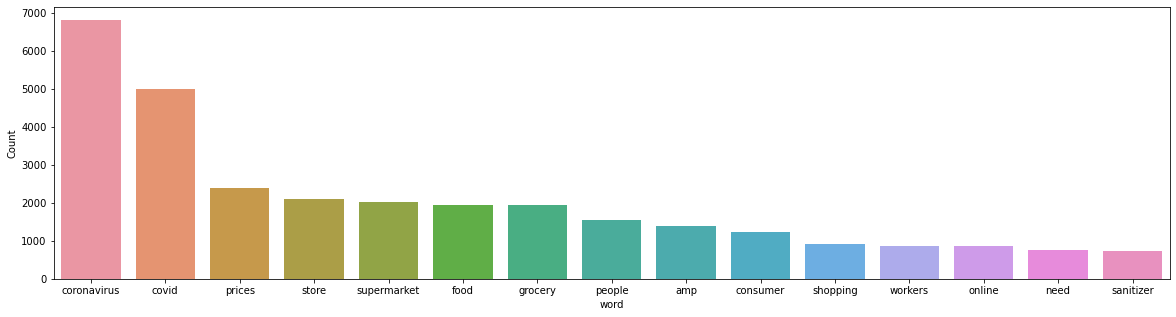

In [20]:
print("Word Frequency for all the words in the comments after stopwords removal ")
freq_words(df['reviews'], 15, 'freq_filtered')

# Sentiment analysis

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


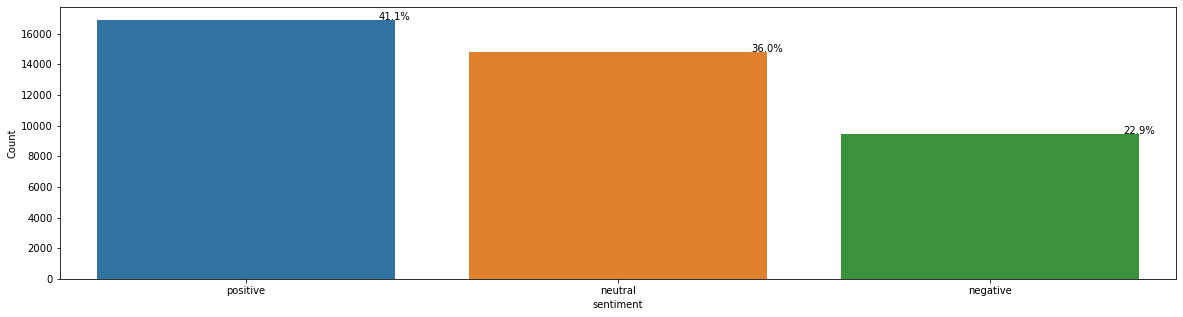

In [21]:
# Plot Sentiment Analysis
def get_text_polarity(tweet): 
    analysis = TextBlob(tweet) 
    return analysis.sentiment.polarity

def get_text_sentiment(polarity): 
    if polarity > 0: 
        return 'positive'
    elif polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

def plot_sentiment(sentiment,terms = 30, save_file = 'plot'):
    fdist = FreqDist(sentiment)
    words_df = pd.DataFrame({'sentiment':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    total = float(len(df))                                   # % calculation
    ax = sns.barplot(data=d, x= "sentiment", y = "count")
    ax.set(ylabel = 'Count')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        plt.savefig(charts_dir + save_file + '.png')
    plt.show()
    

df['sentiment_polarity'] = df.apply(lambda row :get_text_polarity(row['reviews']),axis=1)
df['sentiment'] = df.apply(lambda row :get_text_sentiment(row['sentiment_polarity']),axis=1)
plot_sentiment(df['sentiment'].values, 30, 'sentiment')

In [22]:
text = " ".join(review for review in df.reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5210816 words in the combination of all review.


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


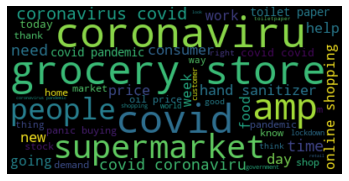

<Figure size 432x288 with 0 Axes>

In [23]:
# wc_stopwords = set()
# wc_stopwords.update(['coronaviru'])
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
#wordcloud = WordCloud(stopwords=wc_stopwords, max_font_size=50, max_words=50, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(charts_dir + 'word_cloud.png')
plt.show()
#wordcloud.to_file(charts_dir + 'word_cloud.png')

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


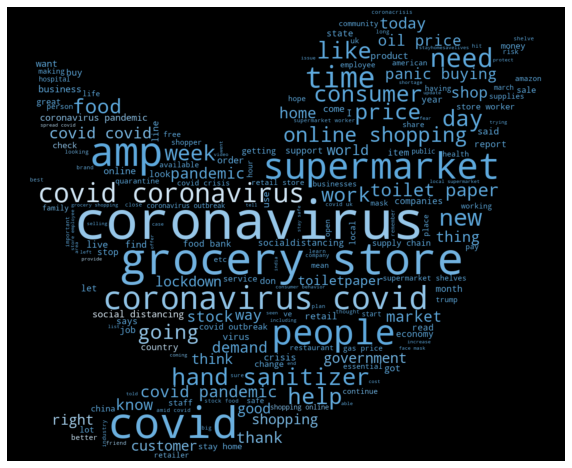

<Figure size 432x288 with 0 Axes>

In [24]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
Mask = np.array(Image.open('../dataset/Twitter.png'))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)
wc_stopwords = set()
wc_stopwords.update(['coronaviru','s','m'])
#wc_stopwords.update(['coronaviru','s','m','.'])
# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(stopwords=wc_stopwords,background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(text)

# Size of the image generated 
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()
plt.savefig(charts_dir + "wordcloud tweets" + '.png')

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


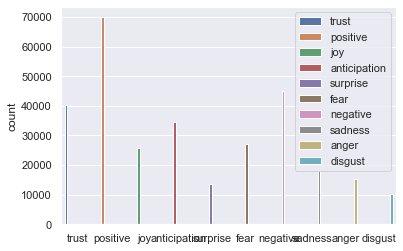

In [25]:
from nrclex import NRCLex
text_object = NRCLex(text)

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=text_object.affect_list, hue=text_object.affect_list,data=df)
fig = ax.get_figure()
fig.savefig(charts_dir  + 'nrc.png')

In [26]:
df['reviews_unstem'] = df['reviews']

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
stemmer = PorterStemmer()
def stemming(words):
    output=[]
    for word in words:
          output.append(stemmer.stem(word))
    return ' '.join(output) 

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
df.to_csv("clean.csv" ,index=False)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
df['reviews']=df.reviews.replace({'viru':'virus'}, regex=True)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df['reviews']

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                             menyrbie phil gahan chrisitv
1        advice talk neighbours family exchange phone n...
2        coronaviruss australia woolworths elderly disa...
3        food stock panic food need stay calm stay safe...
4        ready supermarket covid outbreak I paranoid fo...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough kameronwilds rationing toil...
41155    wrong smell hand sanitizer starting turn coron...
41156    tartiicat newused rift going amazon rn normal ...
Name: reviews, Length: 41157, dtype: object

In [31]:
df['reviews'] = df.apply(lambda row : singularize(row['reviews']), axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
tokenized_reviews = pd.Series(df['reviews']).apply(lambda x: x.split())

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
tokenized_reviews[41155]

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['wrong',
 'smell',
 'hand',
 'sanitizer',
 'starting',
 'turn',
 'coronavirus',
 'covid',
 'coronavirus']

In [34]:
from gensim import  corpora, models
dictionary = corpora.Dictionary(tokenized_reviews) 

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
corpus

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(25, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(30, 1),
  (31, 3),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1)],
 [(30, 1),
  (31, 1),
  (36, 1),
  (39, 1),
  (42, 1),
  (45, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(26, 1),
  (31, 1),
  (42, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),

In [35]:
corpus = [dictionary.doc2bow(rev) for rev in tokenized_reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = models.LdaMulticore(corpus=corpus, id2word=dictionary, 
                                num_topics=10, random_state=100, chunksize=1000, passes=50, workers=2)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
lda_model.save(model_dir+'/topic.model')

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())


[(0,
  '0.040*"supermarket" + 0.037*"covid" + 0.030*"coronavirus" + 0.026*"person" '
  '+ 0.014*"like" + 0.014*"going" + 0.009*"time" + 0.009*"day" + 0.008*"I" + '
  '0.008*"thing"'),
 (1,
  '0.073*"coronavirus" + 0.072*"sanitizer" + 0.071*"covid" + 0.066*"hand" + '
  '0.013*"corona" + 0.013*"stayhome" + 0.010*"use" + 0.010*"stayathome" + '
  '0.008*"virus" + 0.008*"alcohol"'),
 (2,
  '0.061*"consumer" + 0.045*"covid" + 0.020*"coronavirus" + 0.017*"pandemic" + '
  '0.016*"retail" + 0.014*"change" + 0.013*"behavior" + 0.012*"new" + '
  '0.011*"impact" + 0.010*"industry"'),
 (3,
  '0.071*"price" + 0.036*"covid" + 0.026*"coronavirus" + 0.023*"oil" + '
  '0.016*"market" + 0.012*"pandemic" + 0.009*"amp" + 0.009*"demand" + '
  '0.008*"low" + 0.007*"ga"'),
 (4,
  '0.050*"price" + 0.021*"covid" + 0.009*"amp" + 0.008*"mask" + '
  '0.007*"coronavirus" + 0.007*"state" + 0.006*"company" + 0.005*"drug" + '
  '0.005*"pay" + 0.005*"selling"'),
 (5,
  '0.049*"covid" + 0.039*"online" + 0.032*"consumer"

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
lda_model.print_topics() 

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.040*"supermarket" + 0.037*"covid" + 0.030*"coronavirus" + 0.026*"person" + 0.014*"like" + 0.014*"going" + 0.009*"time" + 0.009*"day" + 0.008*"I" + 0.008*"thing"'),
 (1,
  '0.073*"coronavirus" + 0.072*"sanitizer" + 0.071*"covid" + 0.066*"hand" + 0.013*"corona" + 0.013*"stayhome" + 0.010*"use" + 0.010*"stayathome" + 0.008*"virus" + 0.008*"alcohol"'),
 (2,
  '0.061*"consumer" + 0.045*"covid" + 0.020*"coronavirus" + 0.017*"pandemic" + 0.016*"retail" + 0.014*"change" + 0.013*"behavior" + 0.012*"new" + 0.011*"impact" + 0.010*"industry"'),
 (3,
  '0.071*"price" + 0.036*"covid" + 0.026*"coronavirus" + 0.023*"oil" + 0.016*"market" + 0.012*"pandemic" + 0.009*"amp" + 0.009*"demand" + 0.008*"low" + 0.007*"ga"'),
 (4,
  '0.050*"price" + 0.021*"covid" + 0.009*"amp" + 0.008*"mask" + 0.007*"coronavirus" + 0.007*"state" + 0.006*"company" + 0.005*"drug" + 0.005*"pay" + 0.005*"selling"'),
 (5,
  '0.049*"covid" + 0.039*"online" + 0.032*"consumer" + 0.032*"shopping" + 0.017*"coronavirus" + 0.013*

In [42]:
lda_model.print_topics() 

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.040*"supermarket" + 0.037*"covid" + 0.030*"coronavirus" + 0.026*"person" + 0.014*"like" + 0.014*"going" + 0.009*"time" + 0.009*"day" + 0.008*"I" + 0.008*"thing"'),
 (1,
  '0.073*"coronavirus" + 0.072*"sanitizer" + 0.071*"covid" + 0.066*"hand" + 0.013*"corona" + 0.013*"stayhome" + 0.010*"use" + 0.010*"stayathome" + 0.008*"virus" + 0.008*"alcohol"'),
 (2,
  '0.061*"consumer" + 0.045*"covid" + 0.020*"coronavirus" + 0.017*"pandemic" + 0.016*"retail" + 0.014*"change" + 0.013*"behavior" + 0.012*"new" + 0.011*"impact" + 0.010*"industry"'),
 (3,
  '0.071*"price" + 0.036*"covid" + 0.026*"coronavirus" + 0.023*"oil" + 0.016*"market" + 0.012*"pandemic" + 0.009*"amp" + 0.009*"demand" + 0.008*"low" + 0.007*"ga"'),
 (4,
  '0.050*"price" + 0.021*"covid" + 0.009*"amp" + 0.008*"mask" + 0.007*"coronavirus" + 0.007*"state" + 0.006*"company" + 0.005*"drug" + 0.005*"pay" + 0.005*"selling"'),
 (5,
  '0.049*"covid" + 0.039*"online" + 0.032*"consumer" + 0.032*"shopping" + 0.017*"coronavirus" + 0.013*

In [ ]:
rom gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
lda_model.print_topics_matrix()

In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.912307715117693


In [49]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4430643697424041


In [50]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
def get_lda_topics(model, num_topics):
    word_dict = {}
    topics = model.show_topics(num_topics,10)
    word_dict = {'Topic '+str(i):[x.split('*') for x in words.split('+')] \
                 for i,words in model.show_topics(num_topics,10)}
    return pd.DataFrame.from_dict(word_dict)

get_lda_topics(lda_model, 10)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,"[0.040, ""supermarket"" ]","[0.073, ""coronavirus"" ]","[0.061, ""consumer"" ]","[0.071, ""price"" ]","[0.050, ""price"" ]","[0.049, ""covid"" ]","[0.008, ""australium"" ]","[0.089, ""food"" ]","[0.062, ""store"" ]","[0.071, ""toiletpaper"" ]"
1,"[ 0.037, ""covid"" ]","[ 0.072, ""sanitizer"" ]","[ 0.045, ""covid"" ]","[ 0.036, ""covid"" ]","[ 0.021, ""covid"" ]","[ 0.039, ""online"" ]","[ 0.007, ""york"" ]","[ 0.028, ""covid"" ]","[ 0.053, ""grocery"" ]","[ 0.057, ""paper"" ]"
2,"[ 0.030, ""coronavirus"" ]","[ 0.071, ""covid"" ]","[ 0.020, ""coronavirus"" ]","[ 0.026, ""coronavirus"" ]","[ 0.009, ""amp"" ]","[ 0.032, ""consumer"" ]","[ 0.007, ""advertising"" ]","[ 0.021, ""panic"" ]","[ 0.032, ""covid"" ]","[ 0.056, ""coronavirus"" ]"
3,"[ 0.026, ""person"" ]","[ 0.066, ""hand"" ]","[ 0.017, ""pandemic"" ]","[ 0.023, ""oil"" ]","[ 0.008, ""mask"" ]","[ 0.032, ""shopping"" ]","[ 0.007, ""nigerium"" ]","[ 0.019, ""demand"" ]","[ 0.025, ""worker"" ]","[ 0.055, ""toilet"" ]"
4,"[ 0.014, ""like"" ]","[ 0.013, ""corona"" ]","[ 0.016, ""retail"" ]","[ 0.016, ""market"" ]","[ 0.007, ""coronavirus"" ]","[ 0.017, ""coronavirus"" ]","[ 0.006, ""analysi"" ]","[ 0.018, ""stock"" ]","[ 0.023, ""coronavirus"" ]","[ 0.016, ""roll"" ]"
5,"[ 0.014, ""going"" ]","[ 0.013, ""stayhome"" ]","[ 0.014, ""change"" ]","[ 0.012, ""pandemic"" ]","[ 0.007, ""state"" ]","[ 0.013, ""amp"" ]","[ 0.006, ""new"" ]","[ 0.017, ""supply"" ]","[ 0.018, ""supermarket"" ]","[ 0.015, ""quarantine"" ]"
6,"[ 0.009, ""time"" ]","[ 0.010, ""use"" ]","[ 0.013, ""behavior"" ]","[ 0.009, ""amp"" ]","[ 0.006, ""company"" ]","[ 0.011, ""help"" ]","[ 0.006, ""receive"" ]","[ 0.016, ""buying"" ]","[ 0.013, ""person"" ]","[ 0.013, ""easter"" ]"
7,"[ 0.009, ""day"" ]","[ 0.010, ""stayathome"" ]","[ 0.012, ""new"" ]","[ 0.009, ""demand"" ]","[ 0.005, ""drug"" ]","[ 0.008, ""pandemic"" ]","[ 0.005, ""mail"" ]","[ 0.015, ""need"" ]","[ 0.012, ""mask"" ]","[ 0.009, ""pack"" ]"
8,"[ 0.008, ""I"" ]","[ 0.008, ""virus"" ]","[ 0.011, ""impact"" ]","[ 0.008, ""low"" ]","[ 0.005, ""pay"" ]","[ 0.008, ""time"" ]","[ 0.005, ""category"" ]","[ 0.014, ""person"" ]","[ 0.011, ""work"" ]","[ 0.008, ""hoarding"" ]"
9,"[ 0.008, ""thing""]","[ 0.008, ""alcohol""]","[ 0.010, ""industry""]","[ 0.007, ""ga""]","[ 0.005, ""selling""]","[ 0.008, ""scam""]","[ 0.005, ""pres""]","[ 0.014, ""coronavirus""]","[ 0.011, ""amp""]","[ 0.007, ""protective""]"


In [85]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

NameError: name 'vectorizer' is not defined

In [69]:
pip list   #genism=4.0.1

Package                            Version
---------------------------------- -------------------
absl-py                            0.12.0
alabaster                          0.7.12
alembic                            1.4.1
altgraph                           0.17
amqp                               5.0.6
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
annoy                              1.15.2
anyascii                           0.2.0
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
aspect-based-sentiment-analysis    2.0.2
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
auto-py-to-exe                     2.9.0
Automat                            2

In [76]:
mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
# ldamallet = gensim(mallet_path, corpus=corpus, num_topics=20, id2word=dictionary)

In [80]:
import os
# from gensim.models import LdaMallet
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim(mallet_path, corpus=corpus, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_reviews, start=2, limit=40, step=6)

TypeError: 'module' object is not callable

In [66]:
# Can take a long time to run.
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis

# don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_reviews, start=2, limit=40, step=6)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           dictionary=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [53]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|                                                                                          | 0/540 [00:00<?, ?it/s]

ValueError: Stop argument for islice() must be None or an integer: 0 <= x <= sys.maxsize.

In [54]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'data_vectorized' is not defined

# Visualize the topics

In [81]:
np.random.seed(5)
pyLDAvis.enable_notebook()
def draw_mds(mds):        
    vis = gensimvis.prepare(lda_model, corpus, dictionary, mds=mds)
    pyLDAvis.save_html(vis, charts_dir + 'lda_' + mds + '.html')
    return vis

In [82]:
import gensim
vis = draw_mds('mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.285104  0.149916       1        1  18.252363
0     -0.135398  0.070568       2        1  15.975813
7     -0.131571  0.301152       3        1  12.402523
5      0.106995 -0.035712       4        1  12.307923
3      0.338737 -0.054639       5        1  12.214491
4      0.315159  0.162960       6        1   8.910581
2      0.135628  0.322048       7        1   7.195800
1      0.140751 -0.321931       8        1   6.609080
9     -0.341931 -0.194452       9        1   3.511433
6     -0.143266 -0.399910      10        1   2.619992, topic_info=            Term         Freq        Total Category  logprob  loglift
42          food  7499.000000  7499.000000  Default  30.0000  30.0000
264        price  8964.000000  8964.000000  Default  29.0000  29.0000
77         store  7649.000000  7649.000000  Default  28.0000  28.0000
87       grocery  6640.000000  6640.000000  Default  27.0000  27.0000
176     consumer  5670.000000  5670.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
8791         bid    60.366442    61.280466  Topic10  -5.6878   3.6270
7330     tourism    59.869023    60.783044  Topic10  -5.6960   3.6268
29    australium   139.371015   220.507665  Topic10  -4.8511   3.1832
325         page    81.544618   126.932392  Topic10  -5.3871   3.1995
237          new   106.254755  1923.191408  Topic10  -5.1224   0.7461

[579 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
49        1  0.060406        I
49        2  0.938849        I
1110      1  0.181781     able
1110      3  0.756602     able
1110      6  0.058956     able
...     ...       ...      ...
1031      2  0.487866     year
1031      5  0.470104     year
1031      7  0.040261     year
2437     10  0.995663     york
1671      8  0.993102  youtube

[883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 8, 6, 4, 5, 3, 2, 10, 7])

In [83]:
vis = draw_mds('pcoa')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.173714  0.153157       1        1  18.246074
0     -0.120021  0.189131       2        1  15.978306
7     -0.132505  0.074537       3        1  12.397703
5     -0.127396 -0.053193       4        1  12.307301
3     -0.088102 -0.189396       5        1  12.214901
4     -0.021000 -0.110947       6        1   8.913812
2     -0.024693 -0.222545       7        1   7.200397
1      0.105083  0.077026       8        1   6.609984
9      0.262068  0.112295       9        1   3.510666
6      0.320279 -0.030065      10        1   2.620857, topic_info=            Term         Freq        Total Category  logprob  loglift
42          food  7496.000000  7496.000000  Default  30.0000  30.0000
264        price  8965.000000  8965.000000  Default  29.0000  29.0000
77         store  7646.000000  7646.000000  Default  28.0000  28.0000
87       grocery  6637.000000  6637.000000  Default  27.0000  27.0000
176     consumer  5672.000000  5672.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
8791         bid    60.386383    61.300426  Topic10  -5.6878   3.6266
7330     tourism    59.888799    60.802840  Topic10  -5.6960   3.6265
29    australium   139.417053   220.539807  Topic10  -4.8511   3.1831
325         page    81.571554   126.975471  Topic10  -5.3871   3.1992
237          new   106.289853  1923.568138  Topic10  -5.1224   0.7459

[579 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
49        1  0.060398        I
49        2  0.939754        I
1110      1  0.181842     able
1110      3  0.756856     able
1110      6  0.058976     able
...     ...       ...      ...
1031      2  0.487809     year
1031      5  0.470049     year
1031      7  0.040256     year
2437     10  0.995336     york
1671      8  0.992967  youtube

[883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 8, 6, 4, 5, 3, 2, 10, 7])

In [84]:
vis = draw_mds('tsne')
vis


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  18.249744
0       0.648955  71.707100       2        1  15.978387
7      71.019684   9.971006       3        1  12.403884
5       3.785981  33.185135       4        1  12.305057
3     -42.666500  -9.222070       5        1  12.211349
4      -3.621689 -43.526516       6        1   8.915186
2      -3.632402  -4.171708       7        1   7.197147
1     -36.584400  35.804413       8        1   6.608989
9      44.391380  50.615383       9        1   3.509689
6      40.235809 -31.591665      10        1   2.620567, topic_info=            Term         Freq        Total Category  logprob  loglift
42          food  7500.000000  7500.000000  Default  30.0000  30.0000
264        price  8964.000000  8964.000000  Default  29.0000  29.0000
77         store  7648.000000  7648.000000  Default  28.0000  28.0000
87       grocery  6639.000000  6639.000000  Default  27.0000  27.0000
176     consumer  5670.000000  5670.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
8791         bid    60.379696    61.293706  Topic10  -5.6878   3.6268
7330     tourism    59.882168    60.796174  Topic10  -5.6960   3.6266
29    australium   139.401615   220.532047  Topic10  -4.8511   3.1831
325         page    81.562521   126.973265  Topic10  -5.3871   3.1992
237          new   106.278084  1923.160024  Topic10  -5.1224   0.7461

[579 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
49        1  0.060397        I
49        2  0.939738        I
1110      1  0.181765     able
1110      3  0.756536     able
1110      6  0.058951     able
...     ...       ...      ...
1031      2  0.487883     year
1031      5  0.470120     year
1031      7  0.040262     year
2437     10  0.995446     york
1671      8  0.993116  youtube

[883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 8, 6, 4, 5, 3, 2, 10, 7])

In [ ]:
def format_topics_sentences(lda_model, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'topic_perc_contrib', 'topic_keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, tokenized_reviews)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['row_no', 'dominant_topic', 'topic_perc_contrib', 'topic_keywords', 'text']

In [ ]:
df_dominant_topic

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['topic_perc_contrib'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "topic_perc_contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

In [ ]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [ ]:
from enchant.checker import SpellChecker
checker = SpellChecker('en_US','en_UK') # not using id_ID

# sample data
ds = pd.DataFrame({ 'text': ['here is a spllng mstke','the wrld is grwng']})
p = ds['text'].str.lower()

hayo = []

for text in p:
    checker.set_text(text)

    for s in checker:
        sug = s.suggest()[0]
        s.replace(sug)

    print(checker.get_text())
    hayo.append(checker.get_text())

print(hayo)